In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import ShuffleSplit

In [2]:
digits=datasets.load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
len(digits.target)

1797

In [6]:
knn=KNeighborsClassifier()

In [7]:
param_grid={'n_neighbors':range(1,20)}

In [8]:
param_grid

{'n_neighbors': range(1, 20)}

In [9]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_model=GridSearchCV(knn,return_train_score=True, param_grid=param_grid, cv=10, verbose=3)
grid_model

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [20]:
grid_model.fit(digits.data,digits.target)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.933) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.983) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.978) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.966) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.993, test=0.939) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [21]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [22]:
colnames=['param_n_neighbors','mean_train_score','mean_test_score']

In [23]:
grid_df=pd.DataFrame(grid_model.cv_results_, columns=colnames)
grid_df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.974963
1,2,0.990973,0.974407
2,3,0.993322,0.976633
3,4,0.991776,0.972182
4,5,0.990540,0.971074
5,6,0.989427,0.968290
6,7,0.990107,0.967734
7,8,0.988685,0.964944
8,9,0.987881,0.964944
9,10,0.985841,0.962163


In [26]:
grid_df.set_index('param_n_neighbors', inplace=True)

KeyError: "None of ['param_n_neighbors'] are in the columns"

In [27]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
param_n_neighbors,,
3,0.993322,0.976633
1,1.000000,0.974963
2,0.990973,0.974407
4,0.991776,0.972182
5,0.990540,0.971074
6,0.989427,0.968290
7,0.990107,0.967734
8,0.988685,0.964944
9,0.987881,0.964944


In [ ]:
grid_model

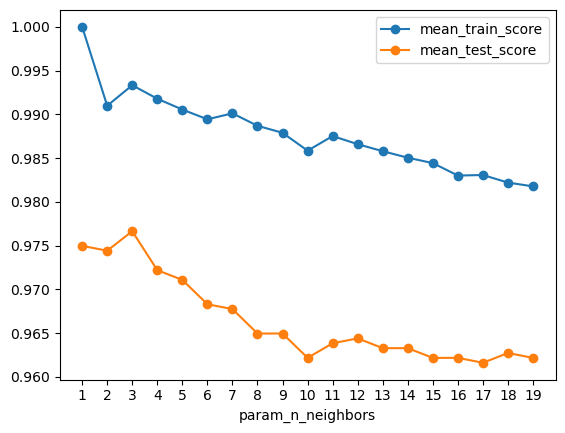

In [29]:
ax=grid_df.plot.line(marker='o')
ax.set_xticks(grid_df.index)

In [30]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [31]:
grid_model.best_params_

{'n_neighbors': 3}

In [32]:
grid_model.best_score_

0.9766325263811299

In [33]:
ss=ShuffleSplit(test_size=0.25, n_splits=20)

In [35]:
grid_model_ss=GridSearchCV(knn,return_train_score=True, cv=ss, param_grid=param_grid, verbose=2)

In [36]:
grid_model_ss

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.25, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=2)

In [37]:
grid_model_ss.fit(digits.data,digits.target)

Fitting 20 folds for each of 19 candidates, totalling 380 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.25, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=2)

In [38]:
grid_model_ss.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [39]:
grid_model_ss.best_params_

{'n_neighbors': 1}

In [40]:
grid_model_ss.best_score_

0.9891111111111112

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
treemodel=DecisionTreeClassifier()

In [44]:
treemodel

DecisionTreeClassifier()

In [47]:
param_tree={'criterion' : ['gini','entropy'],'max_depth': range(1,11),'splitter':['best','random']}

In [51]:
grid_tree=GridSearchCV(treemodel, return_train_score=True, param_grid=param_tree, cv=ss, verbose=2)

In [52]:
grid_tree.fit(digits.data,digits.target)

Fitting 20 folds for each of 20 candidates, totalling 400 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gin

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.25, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)},
             return_train_score=True, verbose=2)

In [53]:
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [54]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [55]:
grid_tree.best_score_

0.8627777777777776

In [56]:
from sklearn. model_selection import cross_val_score

In [57]:
grid_knn=GridSearchCV(knn,param_grid=param_grid,cv=2)
grid_knn

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [59]:
outer_scores=cross_val_score(grid_knn,digits.data,digits.target,cv=5)
outer_scores

array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.96657382])

In [61]:
grid_knn.fit(digits.data,digits.target)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [64]:
preffered_params=grid_knn.best_estimator_.get_params()
preffered_params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [65]:
final_knn=KNeighborsClassifier(**preffered_params)

In [66]:
final_knn.fit(digits.data,digits.target)

KNeighborsClassifier(n_neighbors=1)

In [67]:
final_knn.score(digits.data,digits.target)

1.0